# Data Analysis with Python: Zero to Pandas - Course Project Guidelines

### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 4 questions about the dataset
* Your submission must include at least 4 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.

# Project Title  : Analyze IPL Dataset

* Here I am trying to Analyse IPL Dataset collected from the kaggel dataset [link](https://www.kaggle.com/nowke9/ipldata)
* Dataset description : 
    This dataset contains 2 csv's (matches.csv and deliveries.csv)
* what you're trying to do with it???
     I am trying to answere few questions comes to my mind
        Q1: How many seasons does the dataset has??
        Q2: How many Teams does the dataset has??
        Q3: Overall Total matches won by the team??
        Q4: Runs per batsmen??
        Q5: Teamwise Total runs scored??
        Q6: Seson wise matches won by the team ??
        Q7: Match ID vs Team scores??
        Q8: Analyze how CSK team performed during all seasons (in line chart)??
        Q9: Analyze how SRH & RCB teams scored in 20 overs, in MatchID=1 ??
        Q10 :Season wise winner????
        Q11 : Overall Score board of all teams, overwise????
        Q12 : Analyze Score board in match-1 by (SRH & RCB) teams, overwise????
        Q13 : Analyse the score board with CSK & MI teams, overwise comparison????¶
        
   
* which tools & techniques you're using?? 
    pandas, numpy, matplotlib and seaborn 

* Finally as part of this project I am trying to apply the knowledge what I have gained from zerotopandas.com 

### Step 1: Select a real-world dataset 
 Selected dataset : [IPL Dataset](https://www.kaggle.com/nowke9/ipldata)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
!pip install jovian --upgrade -q

In [3]:
project_name = "zerotopandas-course-project-IPLDataset-Suman" 

In [4]:
import jovian,os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
if not os.path.exists('ipldata'):
    dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 
    import opendatasets as od
    od.download(dataset_url)
    data_dir = './ipldata'
    #os.chdir(data_dir)
os.getcwd()

'D:\\suman\\personal\\PythonMaterials\\EVA_4_stuff_Rohan\\phase_2\\suman_repo\\dataAnalytics\\IPL_DataAnalysis'

In [6]:
print(os.listdir())


['.ipynb_checkpoints', '.jovianrc', 'ipldata', 'ipldata.zip', 'README.md', 'zerotopandas-course-project-IPLDataset-Suman.ipynb']


### Step 2: Perform data preparation & cleaning
Load the dataset into a data frame using Pandas

In [7]:
d_df = pd.read_csv('./ipldata/deliveries.csv')
m_df = pd.read_csv('./ipldata/matches.csv')


print('### In deliveries.csv {} - columns are there : \n\t{}\n\n'.format(len(d_df.columns),d_df.columns))
print('### Number of rows are : {}\n    Number of Columns are : {}\n\n'.format(d_df.shape[0],d_df.shape[1]))

d_df.head()

### In deliveries.csv 21 - columns are there : 
	Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


### Number of rows are : 179078
    Number of Columns are : 21




,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
print('### In matches.csv {} - columns are there : \n\t{}\n\n'.format(len(m_df.columns),m_df.columns))

print('### Number of rows are : {}\n    Number of Columns are : {}\n\n'.format(m_df.shape[0],m_df.shape[1]))


m_df.head()

### In matches.csv 18 - columns are there : 
	Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


### Number of rows are : 756
    Number of Columns are : 18




,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Step-2.1 Identify NAN columns

In [9]:
print('*** In Deliveries Dataset:')        
for c in d_df.columns:
    if d_df.loc[d_df[c].isna()==True].shape[0]!=0:
        print('\t\t### Column "{}" \t contains NA Values'.format(c))
        
        
print('\n\n\n*** In Matches Dataset:')        
for c in m_df.columns:
    if m_df.loc[m_df[c].isna()==True].shape[0]!=0:
        print('\t\t### Column "{}" \t contains NA Values'.format(c))

*** In Deliveries Dataset:
		### Column "player_dismissed" 	 contains NA Values
		### Column "dismissal_kind" 	 contains NA Values
		### Column "fielder" 	 contains NA Values



*** In Matches Dataset:
		### Column "city" 	 contains NA Values
		### Column "winner" 	 contains NA Values
		### Column "player_of_match" 	 contains NA Values
		### Column "umpire1" 	 contains NA Values
		### Column "umpire2" 	 contains NA Values
		### Column "umpire3" 	 contains NA Values


### Step-2.2. Identify duplicate names: 
Handle missing, incorrect and invalid data
* in matched dataset -- team1 column having : 'Rising Pune Supergiant' --- 'Rising Pune Supergiants'
* in matched dataset -- venue column having : 'Feroz Shah Kotla' ---  'Feroz Shah Kotla Ground',

In [10]:
#print(sorted(m_df.team1.unique()))
m_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
m_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
m_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
m_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)


m_df.venue.replace({'Feroz Shah Kotla Ground'         :  'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium'           : 'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk' : 'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium'      : 'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium'              : 'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal' : 'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium'        : 'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

#sorted(m_df.winner.unique())

### Step 3: Perform exploratory analysis & visualization

# Q1: How many seasons does the dataset has??

In [11]:
season = sorted(m_df.season.unique())
print('### Season : ',season)
len(season)

### Season :  [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


12

# Q2: How many Teams does the dataset has??

In [12]:
#teams = np.unique(m_df[['team1','team2']].values)
teams = sorted(pd.concat([m_df.team1,m_df.team2]).unique())
print('### Number of teams : ',len(teams),'\n\t',teams)

### Number of teams :  14 
	 ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


# Q3: Overall Total matches won by the team??

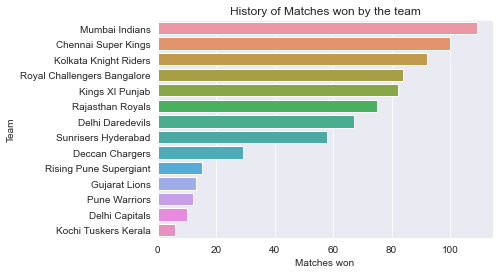

In [13]:
win_history = m_df.winner.value_counts()

#plt.figure(figsize=(25,25))
plt.title('History of Matches won by the team')
plt.ylabel('Team')
plt.xlabel('Matches won')
sns.barplot(win_history.values,win_history.index)
#plt.bar(win_history.values,win_history.index)
plt.show();

In [14]:
win_history

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

### Step 4: Ask & answer questions about the data

# Q4: Runs per batsmen??

In [15]:
batsmen_runs = d_df.groupby('batsman', sort=False)[['batsman_runs']].sum()
batsmen_runs = batsmen_runs.sort_values(by=['batsman_runs'],ascending=False)
batsmen_runs

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
...,...
L Ablish,0
YA Abdulla,0
Abdur Razzak,0


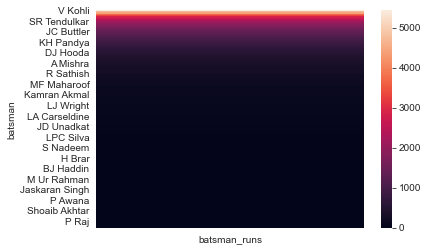

In [16]:
#plt.figure(figsize=(100,100))
sns.heatmap(batsmen_runs);

# Q5: Teamwise Total runs scored??

In [17]:
total_runs = d_df.groupby('batting_team')[['batsman_runs']].sum()
total_runs.sort_values(by=['batsman_runs'],ascending=False)

,batsman_runs
batting_team,
Mumbai Indians,28164
Royal Challengers Bangalore,26775
Kings XI Punjab,26468
Kolkata Knight Riders,25895
Chennai Super Kings,25104
Delhi Daredevils,23115
Rajasthan Royals,21341
Sunrisers Hyderabad,16250
Deccan Chargers,10885


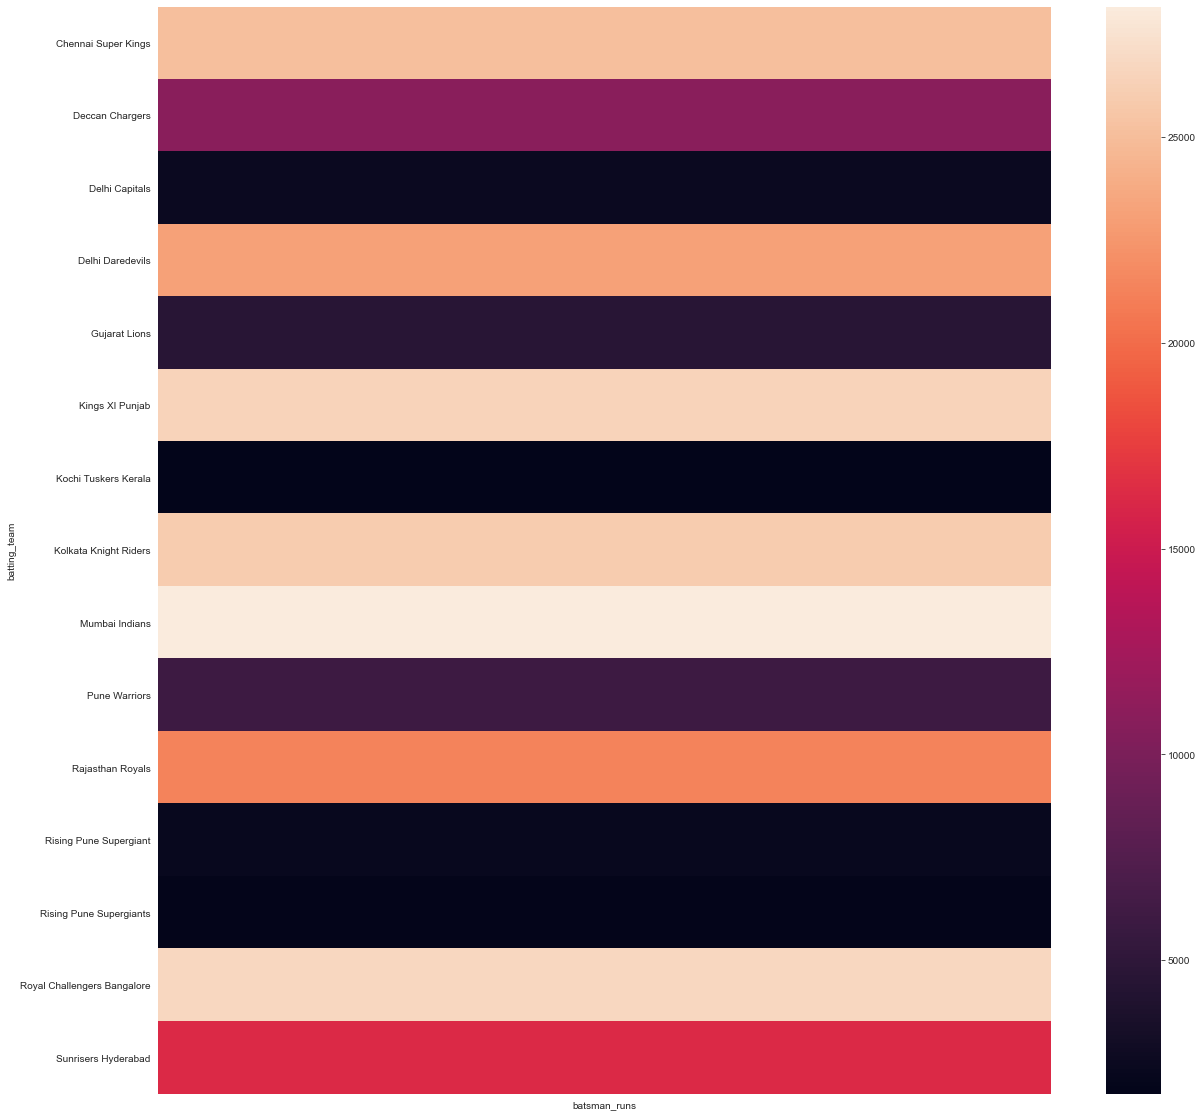

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(total_runs);

# Q6: Seson wise matches won by the team ??

In [19]:
season_win = m_df.groupby(['season','winner'])[['winner']].count()
season_win

winner
season winner                             
2008   Chennai Super Kings               9
       Deccan Chargers                   2
       Delhi Daredevils                  7
       Kings XI Punjab                  10
       Kolkata Knight Riders             6
...                                    ...
2019   Kolkata Knight Riders             6
       Mumbai Indians                   11
       Rajasthan Royals                  5
       Royal Challengers Bangalore       5
       Sunrisers Hyderabad               6

[100 rows x 1 columns]

In [20]:
win_team_seson = season_win.to_dict()['winner']

# Q7: Match ID vs Team scores??

In [21]:
id_scores = d_df.groupby(['match_id','batting_team'])[['total_runs']].sum()
id_scores

total_runs
match_id batting_team                           
1        Royal Challengers Bangalore         172
         Sunrisers Hyderabad                 207
2        Mumbai Indians                      184
         Rising Pune Supergiant              187
3        Gujarat Lions                       183
...                                          ...
11413    Sunrisers Hyderabad                 171
11414    Chennai Super Kings                 162
         Delhi Capitals                      155
11415    Chennai Super Kings                 157
         Mumbai Indians                      152

[1510 rows x 1 columns]

In [22]:
match_scoresByTeam = id_scores.to_dict()['total_runs']
x,y=[],[]
for e in match_scoresByTeam:
    
    if e[1] == 'Chennai Super Kings':
        x.append(e[0])
        y.append(match_scoresByTeam[e])
               

# Q8: Analyze how CSK team performed during all seasons (in line chart)??

Text(0, 0.5, 'Score')

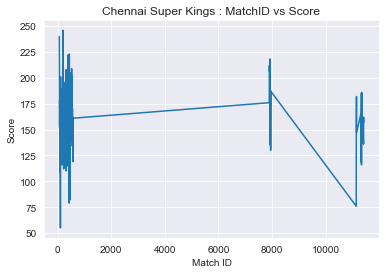

In [23]:
plt.plot(x,y);
plt.title('Chennai Super Kings : MatchID vs Score')
plt.xlabel('Match ID');plt.ylabel('Score')

# Q9: Analyze how SRH & RCB teams scored in 20 overs, in MatchID=1 ??

In [24]:
srh_1 = d_df.loc[(d_df.batting_team=='Sunrisers Hyderabad') & (d_df.match_id==1)]
rcb_1 = d_df.loc[(d_df.batting_team=='Royal Challengers Bangalore') & (d_df.match_id==1)]

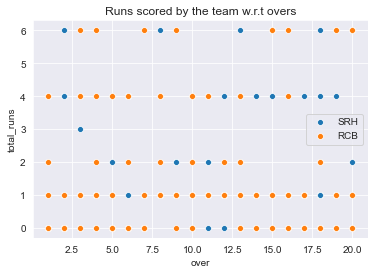

In [27]:
sns.scatterplot('over','total_runs',data=srh_1)
sns.scatterplot('over','total_runs',data=rcb_1);

plt.title('Runs scored by the team w.r.t overs')
plt.legend(['SRH','RCB']);

### Q10 :Season wise winner????

In [30]:
tmp = {}
for year in sorted(m_df.season.unique()):
    season = year
    count = 0
    for ele in win_team_seson:
        if ele[0]==season and win_team_seson[ele]>count:
            count = win_team_seson[ele]
            team   = ele[1]
            
            tmp[season] = team

        else:
            count =count
            
#print(tmp)

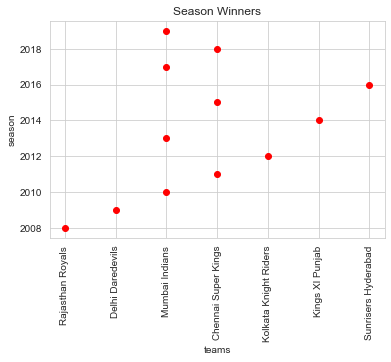

In [31]:
sns.set_style('whitegrid')
plt.title('Season Winners')
plt.xticks(rotation=90)
plt.xlabel('teams')
plt.ylabel('season')

plt.plot(list(tmp.values()),list(tmp.keys()),'or');

In [51]:
d_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Q11 : Overall Score board of all teams, overwise????

In [33]:
runs_df = d_df[['match_id','batting_team','over','total_runs']]
#runs_df
test_df = runs_df.groupby(['match_id','batting_team','over'])['total_runs'].sum().unstack().reset_index()
test_df

over,match_id,batting_team,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,1,Royal Challengers Bangalore,11.0,1.0,16.0,15.0,5.0,6.0,7.0,13.0,...,13.0,7.0,8.0,4.0,9.0,12.0,3.0,2.0,9.0,7.0
1,1,Sunrisers Hyderabad,7.0,16.0,6.0,4.0,9.0,17.0,5.0,11.0,...,10.0,8.0,18.0,8.0,19.0,4.0,7.0,17.0,12.0,16.0
2,2,Mumbai Indians,11.0,8.0,9.0,13.0,7.0,13.0,2.0,3.0,...,10.0,3.0,11.0,5.0,9.0,7.0,10.0,8.0,9.0,30.0
3,2,Rising Pune Supergiant,8.0,15.0,12.0,4.0,4.0,16.0,4.0,10.0,...,4.0,8.0,9.0,15.0,10.0,9.0,10.0,7.0,7.0,15.0
4,3,Gujarat Lions,8.0,8.0,6.0,7.0,11.0,12.0,12.0,8.0,...,4.0,7.0,7.0,7.0,9.0,5.0,11.0,12.0,16.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,11413,Sunrisers Hyderabad,8.0,8.0,15.0,6.0,7.0,10.0,4.0,11.0,...,4.0,7.0,6.0,5.0,12.0,12.0,12.0,10.0,15.0,13.0
1506,11414,Chennai Super Kings,1.0,3.0,9.0,3.0,11.0,15.0,6.0,21.0,...,2.0,26.0,3.0,4.0,4.0,8.0,8.0,10.0,11.0,NaN
1507,11414,Delhi Capitals,8.0,13.0,5.0,7.0,4.0,5.0,3.0,10.0,...,6.0,4.0,2.0,9.0,9.0,9.0,14.0,4.0,12.0,16.0
1508,11415,Chennai Super Kings,7.0,5.0,7.0,14.0,5.0,16.0,5.0,3.0,...,1.0,6.0,4.0,3.0,3.0,20.0,5.0,20.0,13.0,7.0


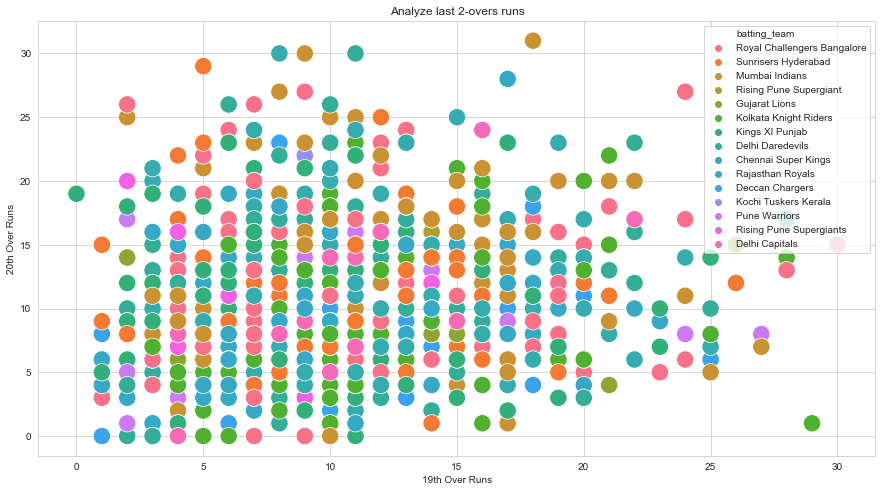

In [39]:
plt.figure(figsize=(15,8))


plt.title('Analyze last 2-overs runs')
sns.scatterplot(19,20,hue='batting_team',data=test_df,s=300);

plt.xlabel('19th Over Runs')
plt.ylabel('20th Over Runs');

### Q12 : Analyze Score board in match-1 by (SRH & RCB) teams, overwise????

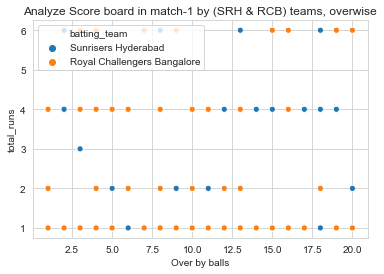

In [44]:
sns.scatterplot('over','total_runs',hue='batting_team',data=runs_df.loc[(runs_df.match_id==1) & (runs_df.total_runs!=0)]);

plt.title('Analyze Score board in match-1 by (SRH & RCB) teams, overwise');
plt.xlabel('Over by balls');

### Q13 : Analyse the score board with CSK & MI teams, overwise comparison????

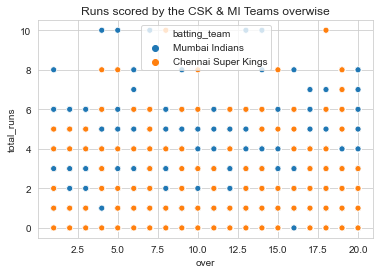

In [47]:
sns.scatterplot('over','total_runs',hue='batting_team',data=runs_df.loc[(runs_df.batting_team=='Chennai Super Kings') | (runs_df.batting_team=='Mumbai Indians')]);

plt.title('Runs scored by the CSK & MI Teams overwise');

### Step 5: Summarize your inferences & write a conclusion

Here I tried to apply the concepts learned as part of this course: 
* over the past 12-years IPL matches, total 14-teams were played.
* Most of the matches won by "Mumbai Indians" : 109 Matches and followed by "Cheenai Super Kings" : 100
* Total Runs scored by the best team "Mumbai Indians" : 28164
* Eventhough "Chennai Super Kings" won 100 matches, they didn't compeate "RCB" in runs.
    ** Mumbai Indians	28164
    ** Royal Challengers Bangalore	26775
    ** Kings XI Punjab	26468
    ** Kolkata Knight Riders	25895
    ** Chennai Super Kings	25104
* Max runs scored by "V Kohli" : 5434 and "SK Raina" : 5415 
* Analyzed season wise how many matched won by the teams.
* Analyzed the number of runs scored by the team per match
* Analyzed how CSK trend goes with respect to number of runs scored in each match
* Analyzed "CSK" and "RCB" runs per over in matchID-1
* Finally winner of the IPL in each season
    {2008: 'Rajasthan Royals', 2009: 'Delhi Daredevils', 2010: 'Mumbai Indians', 2011: 'Chennai Super Kings', 2012: 'Kolkata Knight Riders', 2013: 'Mumbai Indians', 2014: 'Kings XI Punjab', 2015: 'Chennai Super Kings', 2016: 'Sunrisers Hyderabad', 2017: 'Mumbai Indians', 2018: 'Chennai Super Kings', 2019: 'Mumbai Indians'}
* Analyzed score board of all teams, overwise
* Analyzed Score board in match-1 by (SRH & RCB) teams, overwise
* Analyzed the score board with CSK & MI teams, overwise comparison


### Step 6: Make a submission & share your work
- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Browse through projects shared by other participants and give feedback

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sumankanukollu/zerotopandas-course-project-ipldataset-suman-f113d" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sumankanukollu/zerotopandas-course-project-ipldataset-suman-f113d


'https://jovian.ml/sumankanukollu/zerotopandas-course-project-ipldataset-suman-f113d'